In [1]:
# https://github.com/UrviSoni/remove_duplicate_image/blob/master/duplicate_image_remove.ipynb

import hashlib
# from scipy.misc import imread, imresize, imshow
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np
import logging
import datetime
import hashlib, os

In [2]:
# Set up program level variables

sourceDir = 'S:\SandeepG\Official\DataScience\Data\duplicateFileFinder\\' 
destinDir = 'S:\SandeepG\Official\DataScience\Data\duplicateFileFinder\duplicates\\' 
logDir = 'S:\SandeepG\Official\DataScience\Data\duplicateFileFinder\logs\\'
logFile = logDir + time.strftime("%Y%m%d_%H%M%S") + '.log'

logging.basicConfig(filename= logFile, level=logging.INFO)

In [4]:
logging.info(time.strftime("%Y%m%d_%H%M%S"))

In [4]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [5]:
os.chdir(sourceDir)

In [6]:
file_list = os.listdir()
duplicates = []
hash_keys = dict()

for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [7]:
for index in duplicates:
    
    sourceFile = sourceDir + file_list[index[0]]
    destinFile = destinDir + file_list[index[0]]
    
    try:
        if os.path.isfile(destinFile):
            
            destinFile_woExt = os.path.splitext(destinFile)[0]
            destinFile_Extn = os.path.splitext(destinFile)[1]
            expand = 0
            while True:
                expand += 1
                new_file_name = destinFile_woExt + " - " + str(expand) + destinFile_Extn
                if os.path.isfile(new_file_name):
                    continue
                else:
                    destinFile = new_file_name
                    break
        #os.rename(sourceFile, destinFile)
        logging.info(time.strftime("%Y%m%d_%H%M%S") + ' : SUCCESS : Moved : ' + sourceFile + ' | '+ destinFile)
    except:
        logging.info(time.strftime("%Y%m%d_%H%M%S") + ' : ERROR : Moving : ' + sourceFile + ' | '+ destinFile)
    

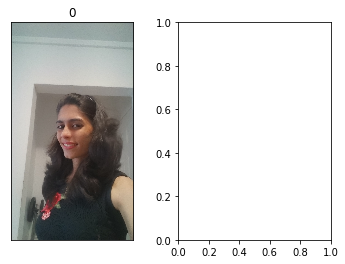

In [7]:
sampleCount = 0 # showing sample images upto 2

for file_indexes in duplicates[:30]:
    try:
        if sampleCount < 2:
            plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
            plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

            plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
            plt.title(str(file_indexes[0]) + ' Duplicate'), plt.xticks([]), plt.yticks([])
            #plt.show()
        else:
            break
    
    except OSError as e:
        continue